In [0]:
import numpy as np
import pandas as pd

import os

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Reshape
from keras.layers import Conv2D, MaxPool2D, GlobalMaxPool2D

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
img_dir = '/content/drive/My Drive/Math_prac/CNN numbers/train/images'

Попробуем выгрузить картинку

In [0]:
img_filenames = os.listdir(img_dir) #названия всех файлов в директории img_dir

<class 'PIL.Image.Image'>
None
L
(30, 30)
<class 'numpy.ndarray'>
float32
(30, 30, 1)
(30, 30)


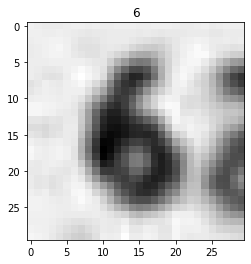

In [0]:
image_test = load_img(os.path.join(img_dir, img_filenames[5]), color_mode='grayscale')
print(type(image_test))
print(image_test.format)
print(image_test.mode)
print(image_test.size)
  # show the image
image_test_arr = img_to_array(image_test)
print(type(image_test_arr))
print(image_test_arr.dtype)
print(image_test_arr.shape)
print(image_test_arr.squeeze().shape)


plt.imshow(image_test_arr.squeeze(), 'gray')
plt.title(img_filenames[5][:1])
plt.show()

# Создание train, test, validation датасетов

In [0]:
img_width = 30
img_height = 30
channels = 1

Функция создания датасета картинок с лейблами из директории

In [0]:
def createLabeledSet(dir, channels, img_height, img_width, filenames):
  dir_filenames = os.listdir(dir) #Названия файлов в директории
  X = np.ndarray(shape=(len(dir_filenames), img_height, img_width, channels),
                     dtype=np.float32)
  Y = []
  i=0
  for img in dir_filenames:
    img_PIL = load_img(os.path.join(dir, img), 
                       color_mode='grayscale', 
                       target_size=(img_height, img_width)
                       )
    img_array = img_to_array(img_PIL)
    if filenames==True:
      label = img[:-4]
    else:
      label = img[:1]
    X[i] = img_array
    Y.append(label)
    i+=1
  Y = list(map(int, Y))
  return X, np.asarray(Y)

Выгрузим все картинки и их классы в датасеты X, Y

In [0]:
X, Y = createLabeledSet(img_dir, channels, img_height, img_width, filenames=False)

Проверим на одном наблюдении

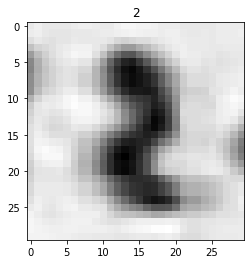

In [0]:
plt.imshow(X[500].squeeze(), 'gray')
plt.title(str(Y[500]))
plt.show()

Разделение на train, test, validation

In [0]:
test_share = 0.2
val_share = 0.1

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_share)
#X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5)

In [0]:
print(len(X_train))
print(len(X_test))
#print(len(X_val))

1200
300


# Создание и обучение модели

In [0]:

model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(None, None, 1), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),

    GlobalMaxPool2D(),

    Dense(64, activation='relu'),
    #Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, None, None, 32)    320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, None, None, 32)    0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, None, None, 64)    18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, None, None, 64)    0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, None, None, 128)   73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, None, None, 128)   0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, None, None, 128)  

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
ohe_train = to_categorical(Y_train, num_classes=10)

In [0]:
print(X_train.shape)
print(ohe_train.shape)

(1200, 30, 30, 1)
(1200, 10)


Обучаем модель

In [0]:
history = model.fit(X_train, ohe_train, epochs=25, batch_size=32)

Epoch 1/30
1500/1500 [==============================] - 4s 3ms/step - loss: 3.2486 - accuracy: 0.1253
Epoch 2/30
1500/1500 [==============================] - 4s 2ms/step - loss: 2.2917 - accuracy: 0.1420
Epoch 3/30
1500/1500 [==============================] - 4s 2ms/step - loss: 2.2560 - accuracy: 0.1593
Epoch 4/30
1500/1500 [==============================] - 4s 2ms/step - loss: 2.0893 - accuracy: 0.2447
Epoch 5/30
1500/1500 [==============================] - 4s 2ms/step - loss: 1.7725 - accuracy: 0.3307
Epoch 6/30
1500/1500 [==============================] - 4s 2ms/step - loss: 1.3008 - accuracy: 0.5007
Epoch 7/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.9995 - accuracy: 0.6280
Epoch 8/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.7107 - accuracy: 0.7460
Epoch 9/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4721 - accuracy: 0.8500
Epoch 10/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.337

In [0]:
predictions = model.predict(X_test)
print(classification_report(Y_test, np.argmax(predictions, axis=1), digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        23
           1     1.0000    1.0000    1.0000        52
           2     1.0000    1.0000    1.0000        26
           3     1.0000    1.0000    1.0000        26
           4     1.0000    0.9600    0.9796        25
           5     1.0000    1.0000    1.0000        40
           6     0.9630    1.0000    0.9811        26
           7     1.0000    1.0000    1.0000        26
           8     1.0000    0.9706    0.9851        34
           9     0.9565    1.0000    0.9778        22

    accuracy                         0.9933       300
   macro avg     0.9919    0.9931    0.9924       300
weighted avg     0.9936    0.9933    0.9933       300



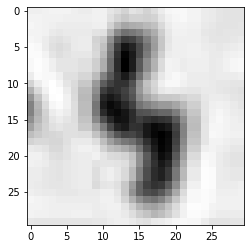

Prediction:4


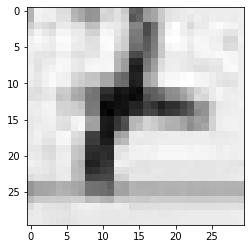

Prediction:7


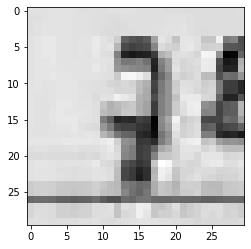

Prediction:7


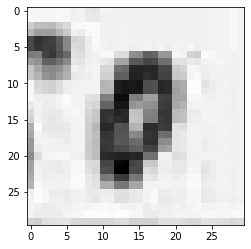

Prediction:0


In [0]:
for i in range(4):
  plt.imshow(X_test[i].squeeze(), 'gray')
  plt.show()
  print('Prediction:'+np.argmax(predictions, axis=1)[i].astype(str))
  #print(np.argmax(predictions, axis=1)[i])

In [0]:
final_images, filenames = createLabeledSet(test_dir, channels, img_height, img_width, filenames=True)

In [0]:
final_test_predictions = model.predict(final_images)
pd.DataFrame({'Predicted': np.argmax(final_test_predictions, axis=1).astype(int), 'Id': filenames.astype(int)}).to_csv('/content/drive/My Drive/Colab Notebooks/CNN_digits_solution.csv', 
                                                                                                                       index=False)